<a href="https://colab.research.google.com/github/Savaliyaniks1/Pharmaceutical-Sales-prediction_Project_6-/blob/main/EDA__Rossmann_Pharmaceuticals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of Rossmann Pharmaceuticals sales Data.

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys,os
warnings.filterwarnings('ignore')

In [ ]:
store_df = pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# Reading store csv file.
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Reading the sales training csv file

train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


# General statistics

### store_df

In [ ]:
# number of elements in the store df

store_df.size

11150

In [ ]:
# shape of the data

store_df.shape

(1115, 10)

In [ ]:
# check info

store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## train_df

In [ ]:
# number of elements in the train df
train_df.size

9154881

In [ ]:
# check the shape of the data

train_df.shape

(1017209, 9)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


# Missing Values

## store_df

In [ ]:
# define a function to show percentage of missing values
def percent_missing_values(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

    return missing_value_df



In [ ]:
missing_df = percent_missing_values(store_df)
missing_df = missing_df[missing_df['percent_missing'] > 0]
missing_df

,column_name,percent_missing
CompetitionDistance,CompetitionDistance,0.269058
CompetitionOpenSinceMonth,CompetitionOpenSinceMonth,31.748879
CompetitionOpenSinceYear,CompetitionOpenSinceYear,31.748879
Promo2SinceWeek,Promo2SinceWeek,48.789238
Promo2SinceYear,Promo2SinceYear,48.789238
PromoInterval,PromoInterval,48.789238


From the missing table we can recognize two groups with a pattern,the second and third columns and the next 3 columns.columns in each group have the same number of missing values. This indicates that if we investigate deeper we might get some insight.

In [ ]:
# number of raw with missing values for the whole dataset

count_missing_rows = store_df.isnull().any(axis=1).sum()
print('count_missing_rows',count_missing_rows)

count_missing_rows 750


In [ ]:
# number of rows with missing values for group 1 (Promo2SinceWeek, Promo2SinceYear, PromoInterval)

count_missing_rows_group1 = store_df[store_df[['Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']].isnull().all(axis=1)].shape[0]
print('count_missing_rows_group1',count_missing_rows_group1)

count_missing_rows_group1 544


In [ ]:
# with missing values for group 2 ('CompetitionOpenSinceMonth','CompetitionOpenSinceYear')

count_missing_rows_group2 = store_df[store_df[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].isnull().all(axis=1)].shape[0]

print('count_missing_rows_group2',count_missing_rows_group2)

count_missing_rows_group2 354


In [ ]:
# Dataframe containing the missing rows for columns in group 1

store_df[store_df[['Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']].isnull().all(axis=1)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# all unique values for each column

unique_values = store_df.nunique()
unique_values

,0
Store,1115
StoreType,4
Assortment,3
CompetitionDistance,654
CompetitionOpenSinceMonth,12
CompetitionOpenSinceYear,23
Promo2,2
Promo2SinceWeek,24
Promo2SinceYear,7
PromoInterval,3


In [ ]:
# value counts fro each column.

value_counts = store_df.value_counts()
value_counts

,,,,,,,,,,count
Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1
753,d,c,540.0,11.0,2012.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec",1
750,d,a,8670.0,2.0,2002.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1
749,a,a,3410.0,8.0,2011.0,1,14.0,2015.0,"Jan,Apr,Jul,Oct",1
748,d,a,2380.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",1
...,...,...,...,...,...,...,...,...,...,...
370,d,a,8250.0,10.0,2000.0,1,31.0,2009.0,"Jan,Apr,Jul,Oct",1
368,d,c,1450.0,4.0,2005.0,1,45.0,2009.0,"Feb,May,Aug,Nov",1
361,c,c,4490.0,5.0,2014.0,1,5.0,2013.0,"Feb,May,Aug,Nov",1


In [ ]:
store_df['Promo2'].value_counts()

,count
Promo2,
1,571
0,544


In [ ]:
store_df['Promo2SinceWeek'].value_counts()

,count
Promo2SinceWeek,
14.0,81
40.0,77
31.0,44
10.0,42
5.0,39
1.0,35
37.0,35
13.0,34
45.0,34


In [ ]:
store_df['Promo2SinceYear'].value_counts()

,count
Promo2SinceYear,
2011.0,128
2013.0,120
2014.0,95
2012.0,81
2009.0,73
2010.0,64
2015.0,10


In [ ]:
# check the exact data type of the object

pd.api.types.infer_dtype(store_df['PromoInterval'])

'string'

In [ ]:
# all the unique values

store_df['PromoInterval'].value_counts()

,count
PromoInterval,
"Jan,Apr,Jul,Oct",335
"Feb,May,Aug,Nov",130
"Mar,Jun,Sept,Dec",106


In [ ]:
store_df[store_df['Promo2SinceWeek']==0].shape

(0, 10)

In [ ]:
store_df[store_df['Promo2SinceYear']==0].shape

(0, 10)

In [ ]:
store_df[store_df['PromoInterval']=='0,0,0,0'].shape

(0, 10)

In [ ]:
def fix_missing_values(df, col_list, value):
  for col in col_list:
    df[col] = df[col].fillna(value)
  return df

# Make sure the column names in the col_list are correct
fix_missing_values(store_df,['Promo2SinceWeek','Promo2SinceYear'],0)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,NaN
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,NaN
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,NaN


In [ ]:
print(store_df.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64


In [ ]:
fix_missing_values(store_df,['PromoInterval'],'0,0,0,0')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0"
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0"
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,"0,0,0,0"
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"


In [ ]:
print(store_df.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64


### 544 missing values in the column PromoInterval have been replaced by 0,0,0,0.

Now it's time fro the second group


In [ ]:
# replace missing value 'CompetitionDistance' column with maximum value.

max_dist = store_df['CompetitionDistance'].max()
max_dist

75860.0

In [ ]:
fix_missing_values(store_df,['CompetitionDistance'],max_dist)

store_df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


In [ ]:
# deriving new column

store_df['Competitionbeforestoreopened'] = store_df['CompetitionOpenSinceYear'].apply(lambda x: 1 if np.isnan(x) else 0)
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Competitionbeforestoreopened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,"0,0,0,0",0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,"0,0,0,0",1
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,"0,0,0,0",1


In [ ]:
min_year = store_df['CompetitionOpenSinceYear'].min()
min_year

1900.0

In [ ]:
min_month = store_df['CompetitionOpenSinceMonth'].min()
min_month

1.0

In [ ]:
# inpute the column CompetitionOpenSinceYear with 1900 and the column CompetitionOpenSinceMonth with 1.

fix_missing_values(store_df,['CompetitionOpenSinceYear'],1900)
fix_missing_values(store_df,['CompetitionOpenSinceMonth'],1)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Competitionbeforestoreopened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,"0,0,0,0",0
1112,1113,a,c,9260.0,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
1113,1114,a,c,870.0,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1


In [ ]:
store_df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0


The dataset contains 0 missing values.

# Train_df

In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
train_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


The dataset contains 0 % missing values.

# data types

# store_df

In [ ]:
# check if there are column with mixed data types

def show_cols_mixed_data_types(df):
    mixed_cols = []
    for col in df.columns:
        if len(set(df[col].apply(type))) > 1:
            mixed_cols.append(col)
    return mixed_cols


print("show_cols_mixed_data_types: ",show_cols_mixed_data_types(store_df))

show_cols_mixed_data_types:  []


In [ ]:
store_df.dtypes

,0
Store,int64
StoreType,object
Assortment,object
CompetitionDistance,float64
CompetitionOpenSinceMonth,float64
CompetitionOpenSinceYear,float64
Promo2,int64
Promo2SinceWeek,float64
Promo2SinceYear,float64
PromoInterval,object


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Competitionbeforestoreopened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0


In [ ]:
# get the columns with object data type

string_columns  = store_df.select_dtypes(include=['object']).columns.tolist()
string_columns

['StoreType', 'Assortment', 'PromoInterval']

In [ ]:
# Convert 'PromoInterval' to string type
store_df['PromoInterval'] = store_df['PromoInterval'].astype(str)


In [ ]:
store_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Store                         1115 non-null   int64  
 1   StoreType                     1115 non-null   object 
 2   Assortment                    1115 non-null   object 
 3   CompetitionDistance           1115 non-null   float64
 4   CompetitionOpenSinceMonth     1115 non-null   float64
 5   CompetitionOpenSinceYear      1115 non-null   float64
 6   Promo2                        1115 non-null   int64  
 7   Promo2SinceWeek               1115 non-null   float64
 8   Promo2SinceYear               1115 non-null   float64
 9   PromoInterval                 1115 non-null   object 
 10  Competitionbeforestoreopened  1115 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 95.9+ KB


### all above types are good to go for further analysis no need to change anything.

# train_df

### Let's check if there are columns with mixed data types.

In [ ]:
train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [ ]:
show_cols_mixed_data_types(train_df)

print("show_cols_mixed_data_types: ",show_cols_mixed_data_types(train_df))

show_cols_mixed_data_types:  ['StateHoliday']


In [ ]:
# check unique values in StateHoliday column

train_df['StateHoliday'].value_counts().index

Index(['0', 0, 'a', 'b', 'c'], dtype='object', name='StateHoliday')

In [ ]:
def convert_to_string(df, cols):
     for col in cols:
        df[col] = df[col].astype(str)

convert_to_string(train_df,['StateHoliday'])

In [ ]:
# convert date column into date time format

train_df['Date'] = pd.to_datetime(train_df['Date'])


In [ ]:
train_df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1017209 entries, 0 to 1017208
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 MB


In [ ]:
train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


# Duplicates

## store_df

In [ ]:
# search for duplicate rows and drop them.

store_df.duplicated().sum()

0

### No duplicate rows were found.

# train_df

In [ ]:
train_df.duplicated().sum()

0

### No duplicate rows found for train_df datatset

# Remove outlier

## train_df

In [ ]:
train_df.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01


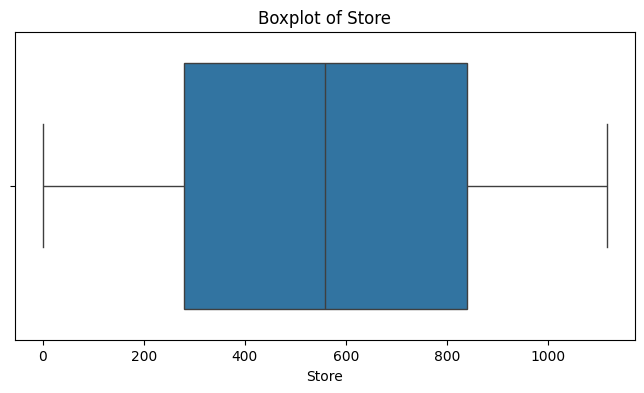

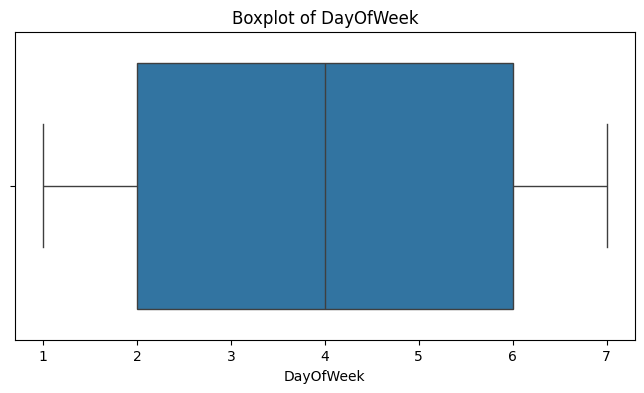

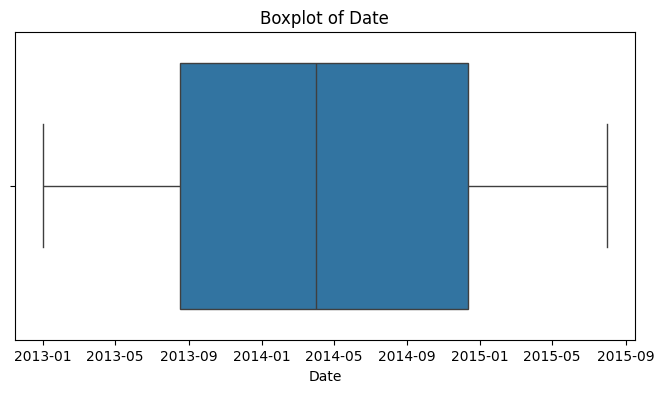

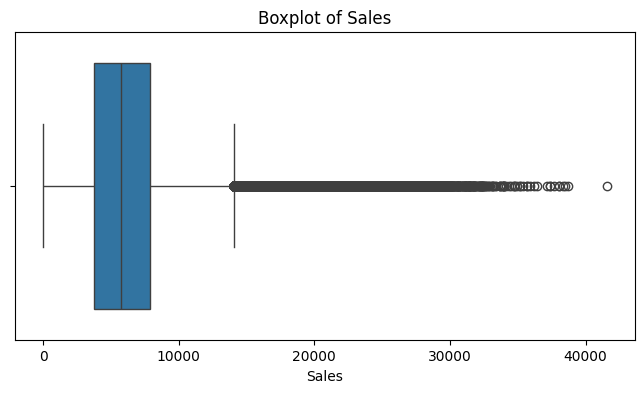

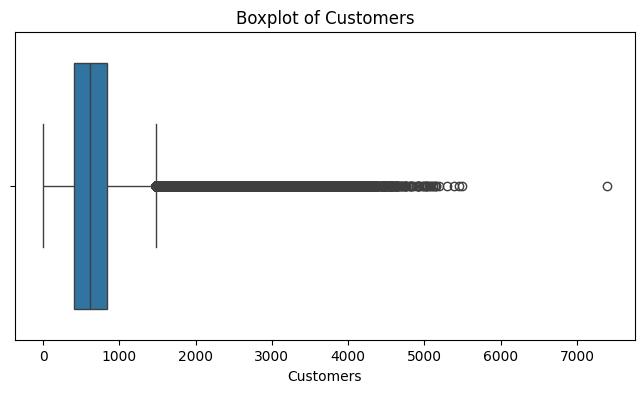

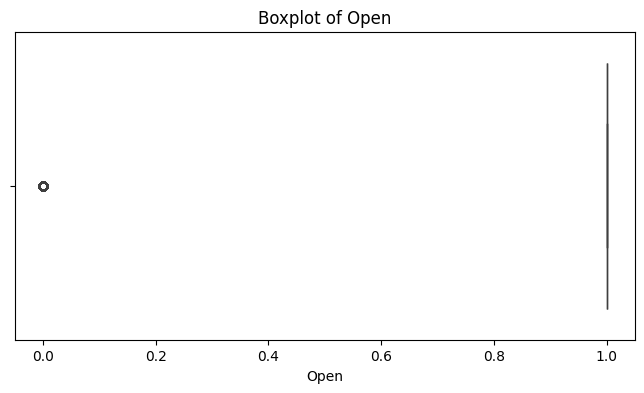

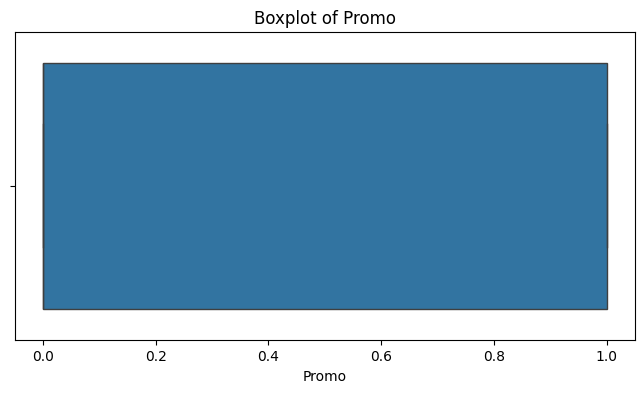

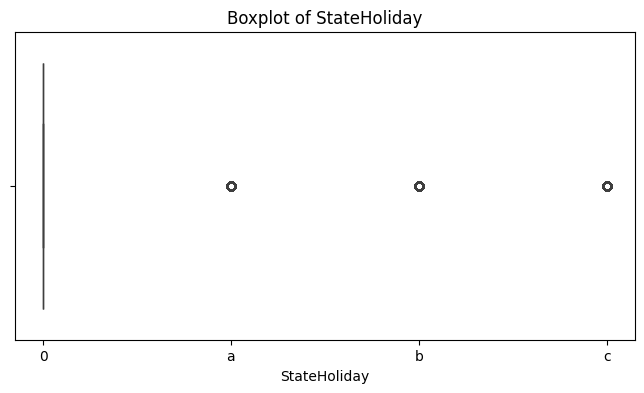

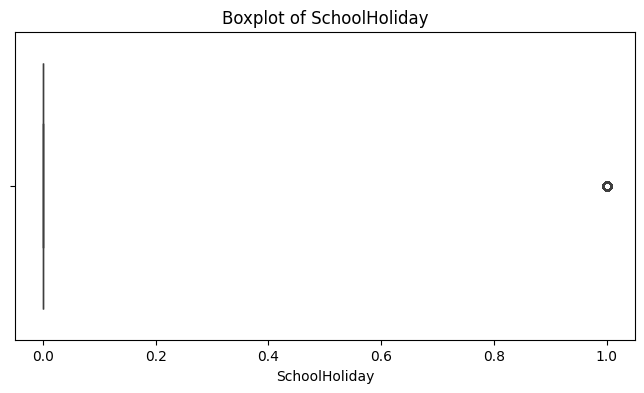

In [ ]:

# Identify and visualize outliers for each column

for column in train_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
def remove_outliers(col):
  sorted(col)
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  l1 = q1-(1.5*iqr)
  u1 = q3+(1.5*iqr)
  return l1,u1

In [ ]:

for i in train_df[
  [
      'Sales',
      'Customers'

  ]
]:
  if train_df[i].dtype != 'object':
    l1,u1 = remove_outliers(train_df[i])
    train_df[i] = np.where(train_df[i] > u1, u1, train_df[i])
    train_df[i] = np.where(train_df[i] < l1, l1, train_df[i])

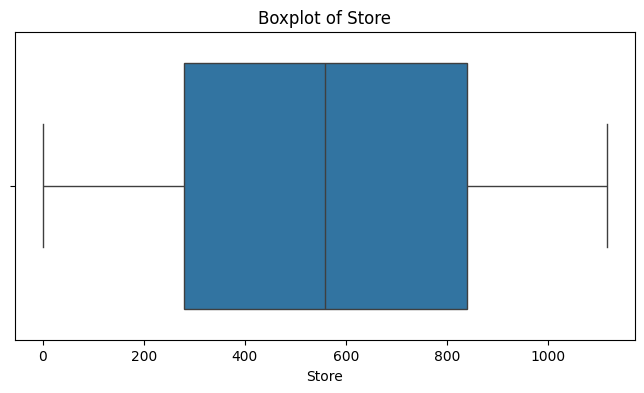

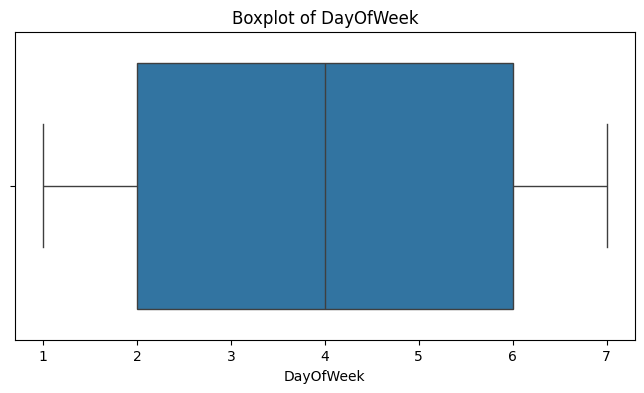

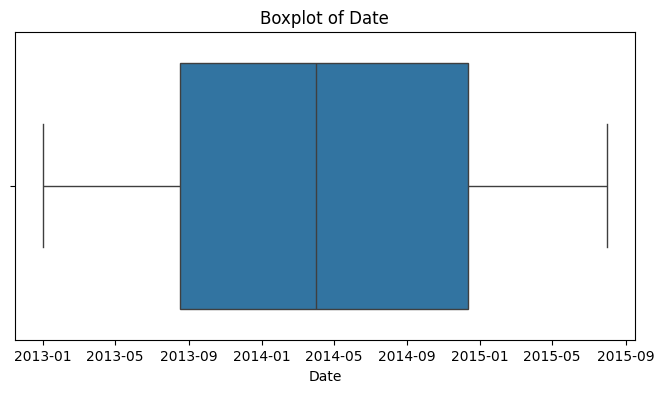

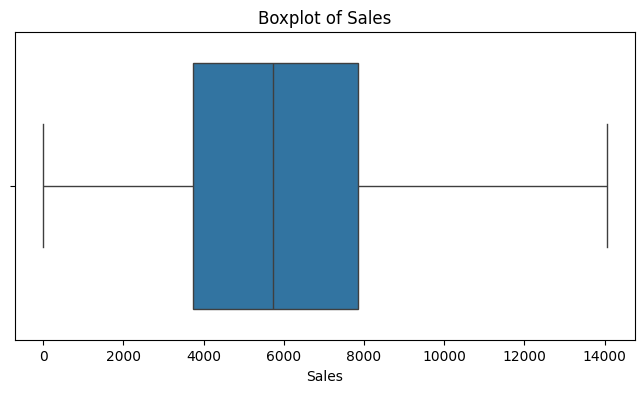

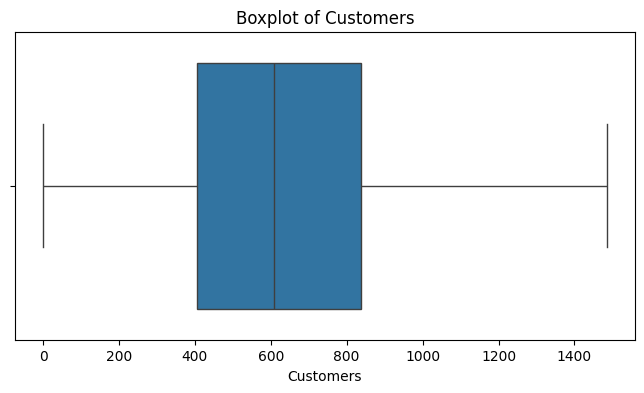

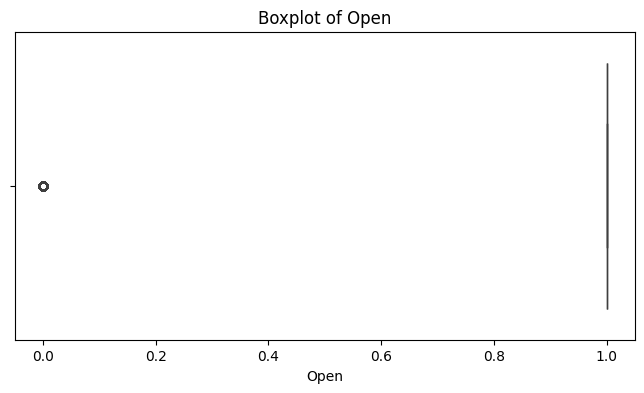

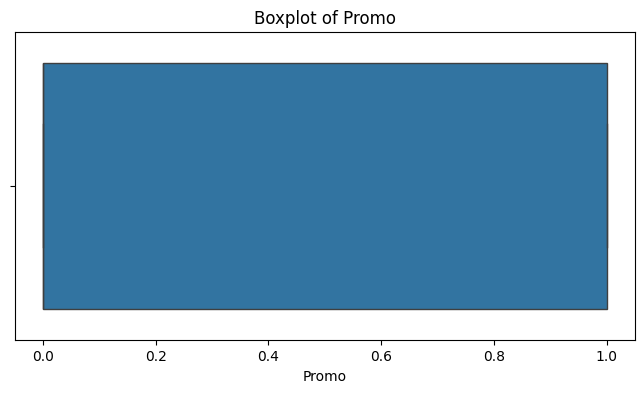

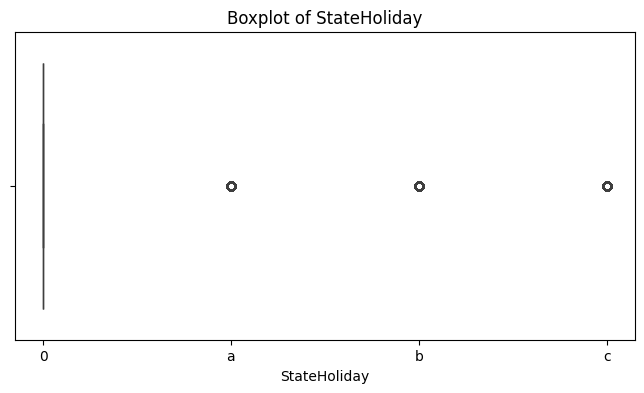

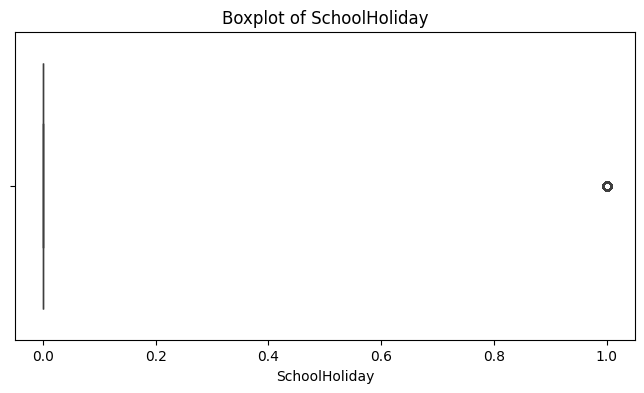

In [ ]:

# Identify and visualize outliers for each column after removing.

for column in train_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# store_df

In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Competitionbeforestoreopened
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5594.466368,5.248430,1974.167713,0.512108,12.083408,1030.239462,0.317489
std,322.01708,8479.266802,3.929836,50.866086,0.500078,15.542241,1006.038782,0.465708
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,1.000000,1900.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000,0.000000
75%,836.50000,6905.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000,1.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,1.000000


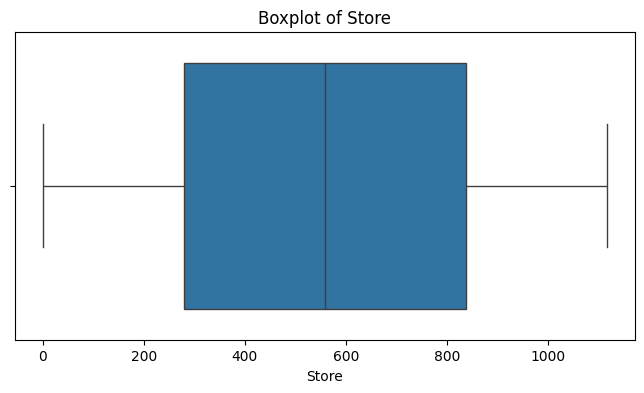

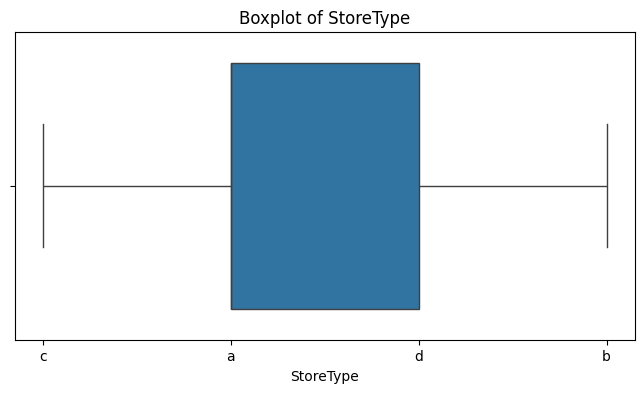

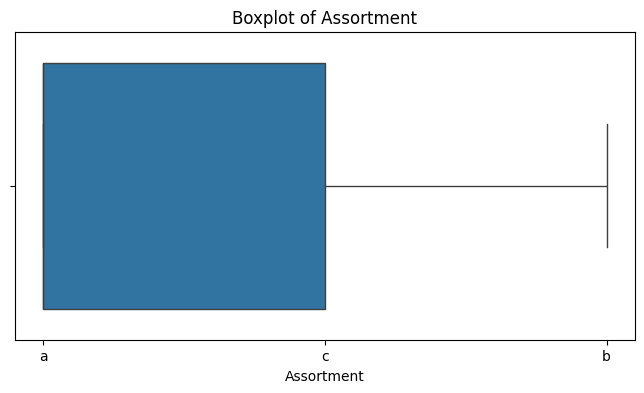

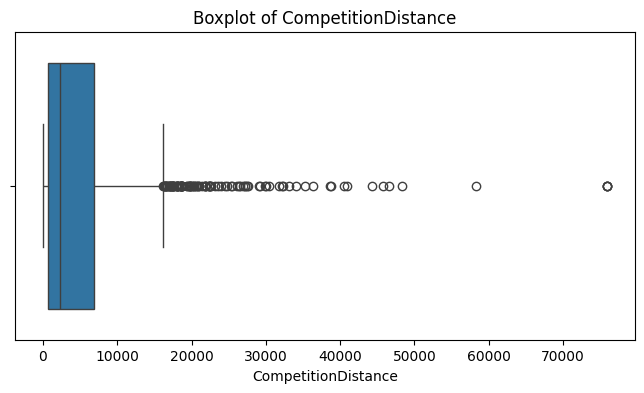

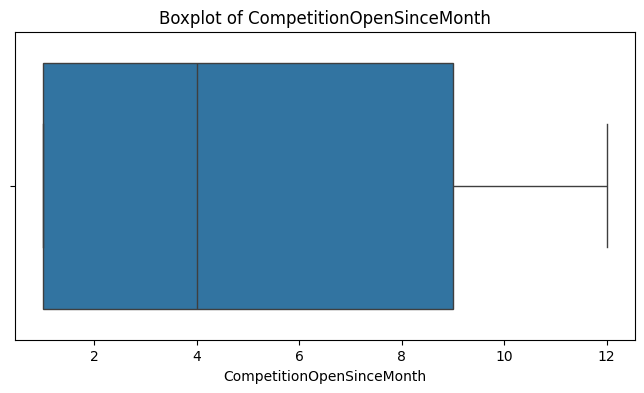

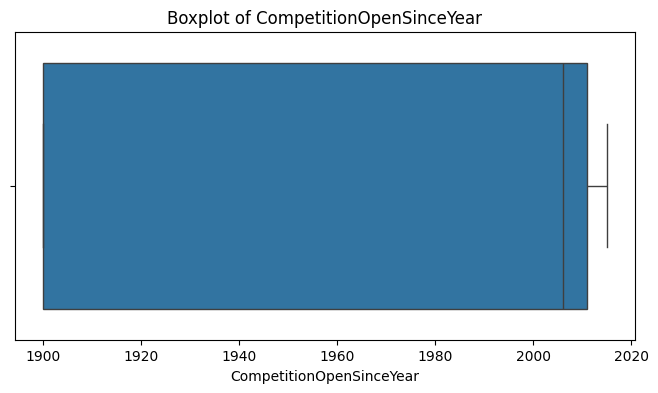

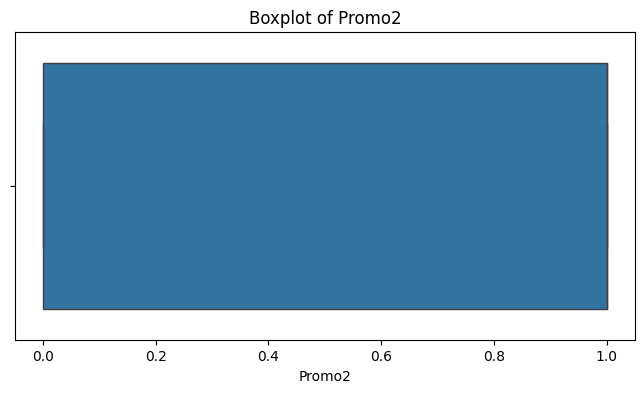

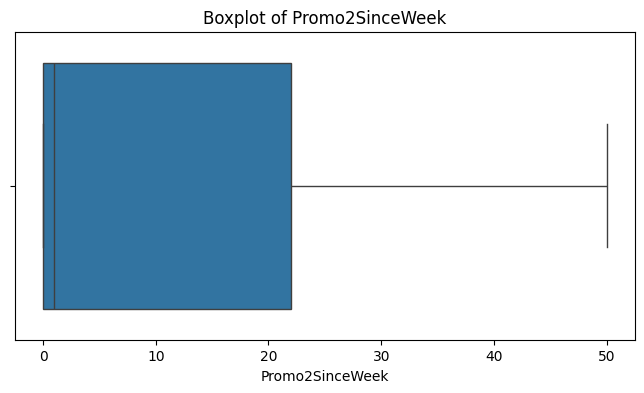

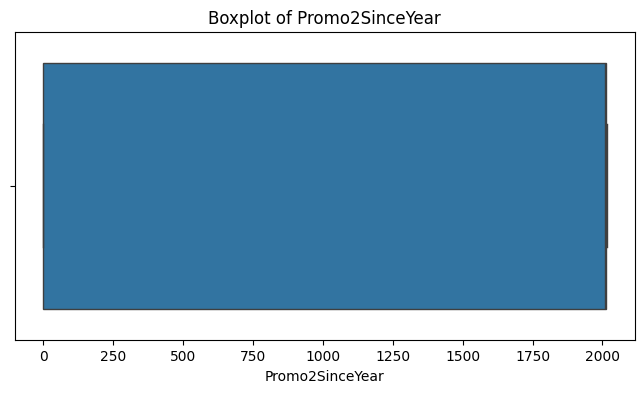

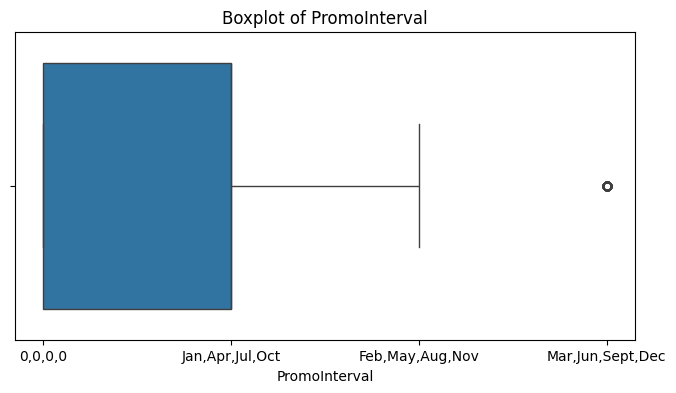

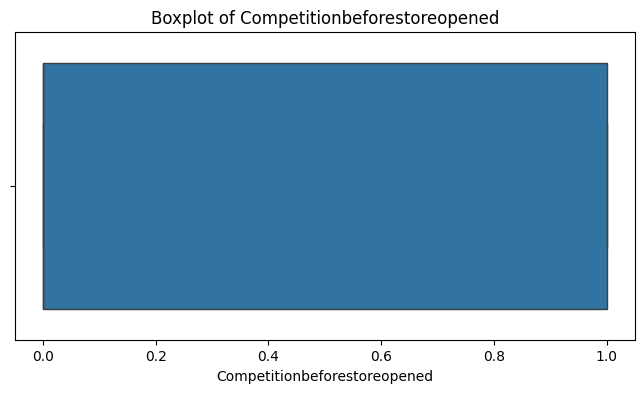

In [ ]:

# Identify and visualize outliers for each column

for column in store_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=store_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
def remove_outliers(col):
  sorted(col)
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  l1 = q1-(1.5*iqr)
  u1 = q3+(1.5*iqr)
  return l1,u1

In [ ]:

for i in store_df[
  [
      'CompetitionDistance',

  ]
]:
  if store_df[i].dtype != 'object':
    l1,u1 = remove_outliers(store_df[i])
    store_df[i] = np.where(store_df[i] > u1, u1, store_df[i])
    store_df[i] = np.where(store_df[i] < l1, l1, store_df[i])

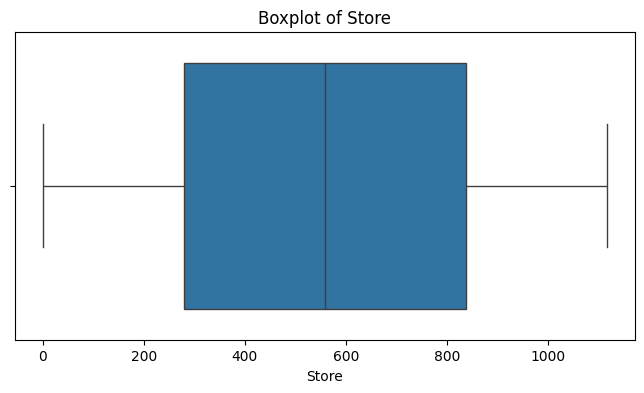

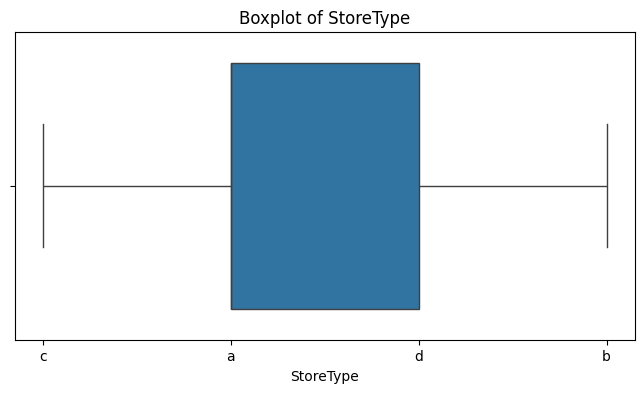

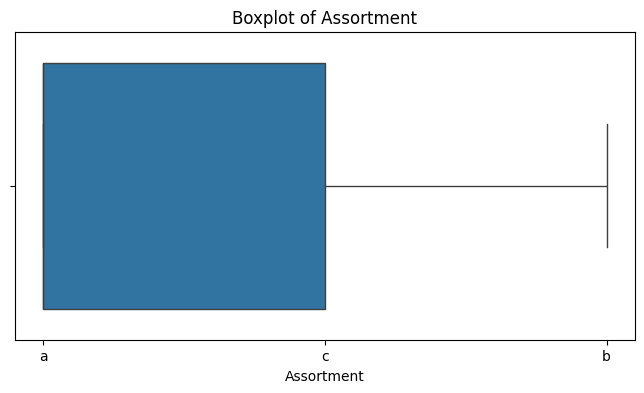

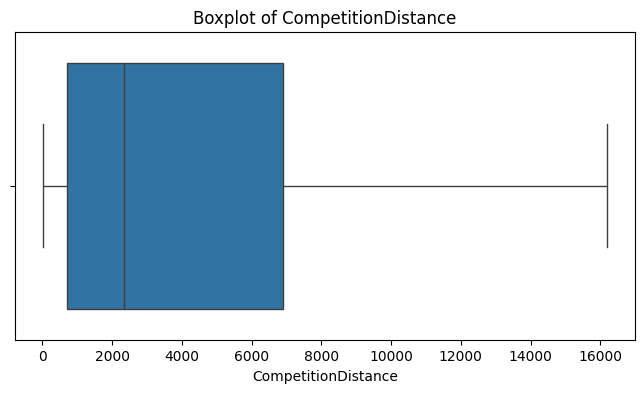

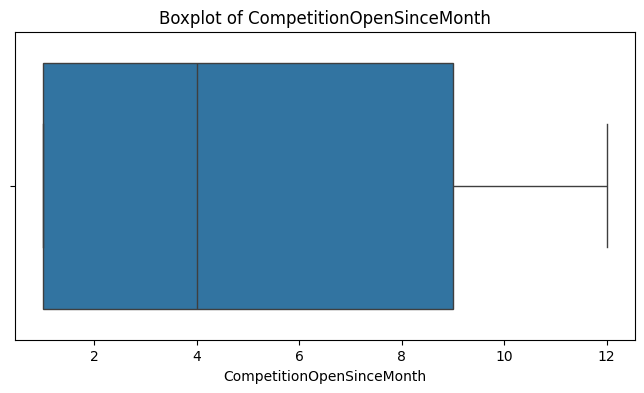

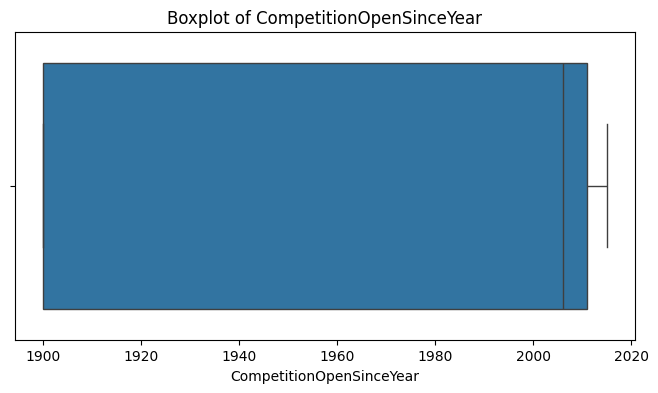

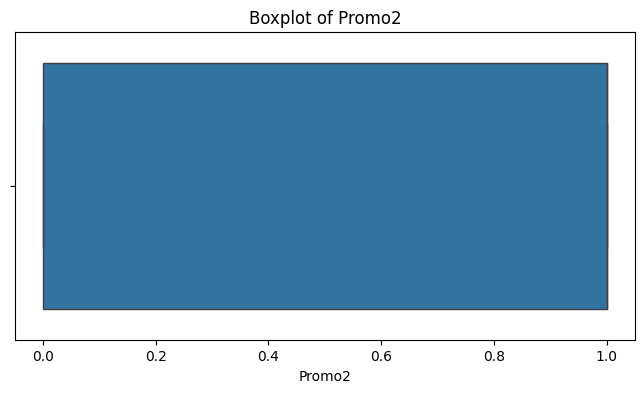

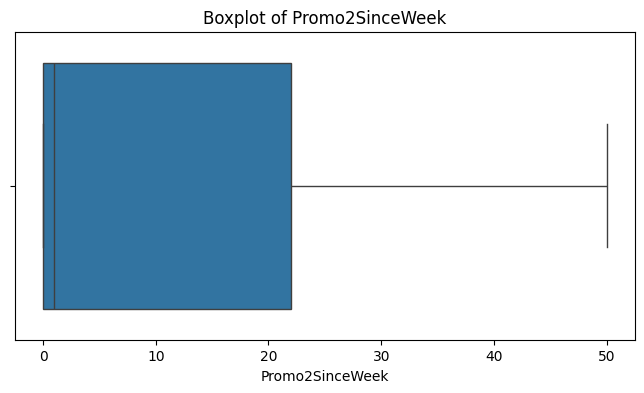

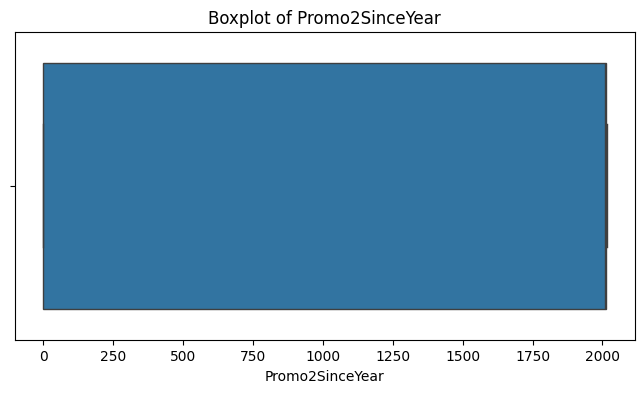

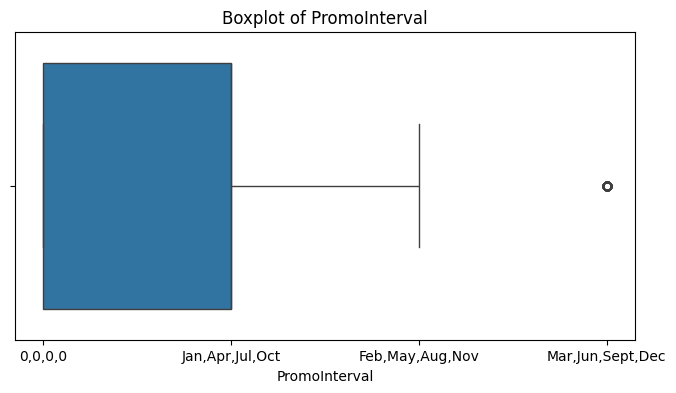

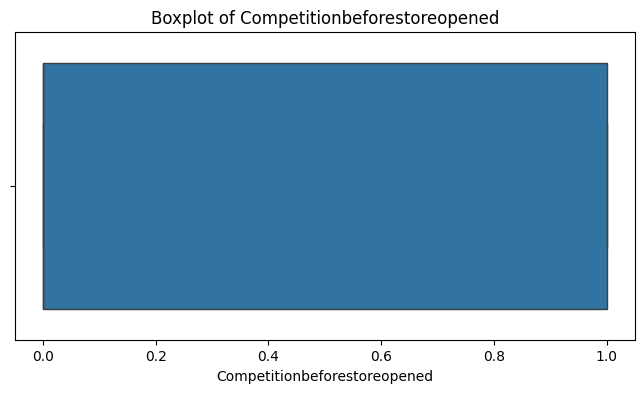

In [ ]:
# Identify and visualize outliers for each column after removing.

for column in store_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=store_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Feature Engineering

# train_df

### Even through we have a date column it will be complex to query our data based on week month,year, etc. so. inorder to gain complex insight easly,i have derived the following features.

In [ ]:
train_df['Year'] = train_df['Date'].apply(lambda x: x.year)
train_df['Month'] = train_df['Date'].apply(lambda x: x.month)
train_df['DayofMonth'] = train_df['Date'].apply(lambda x: x.day)
train_df['WeekofYear'] = train_df['Date'].apply(lambda x: x.weekofyear)
train_df['Weekday'] = train_df['Date'].apply(lambda x: 0 if (x in [6,7]) else 1)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  float64       
 4   Customers      1017209 non-null  float64       
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  DayofMonth     1017209 non-null  int64         
 12  WeekofYear     1017209 non-null  int64         
 13  Weekday        1017209 non-null  int64         
dtypes: datetime64[ns](1), float64(2), 

In [ ]:
train_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayofMonth,WeekofYear,Weekday
190895,231,2,2015-02-10,4266.0,343.0,1,0,0,0,2015,2,10,7,1
1014860,996,4,2013-01-03,4753.0,630.0,1,0,0,0,2013,1,3,1,1
127812,703,3,2015-04-08,3199.0,335.0,1,0,0,1,2015,4,8,15,1
187747,428,5,2015-02-13,5422.0,484.0,1,0,0,0,2015,2,13,7,1
708030,791,6,2013-10-05,5313.0,615.0,1,0,0,0,2013,10,5,40,1
950137,943,6,2013-03-02,6637.0,612.0,1,0,0,0,2013,3,2,9,1
1012584,950,6,2013-01-05,3702.0,381.0,1,0,0,0,2013,1,5,1,1
530353,399,4,2014-03-13,3946.0,449.0,1,0,0,0,2014,3,13,11,1
102872,293,4,2015-04-30,9694.0,1145.0,1,1,0,0,2015,4,30,18,1
398474,403,5,2014-07-11,6806.0,702.0,1,0,0,1,2014,7,11,28,1


# store_df

In [ ]:
store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Competitionbeforestoreopened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0


In [ ]:
def getMonth(month_list,index):
  months = ['0','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
  if isinstance(month_list, str):
    month_list = month_list.split(',')
    try:
      month = month_list[index]
      # Check if the month abbreviation in the PromoInterval column matches the format in months
      if len(month) == 4:
        month = month[:3] # shorten the 4-letter abbreviation to 3 letters
      return months.index(month) # return the index from months
    except IndexError:
      return 0
  else:
    return 0

# Create new columns for each month in PromoInterval
store_df['PromoInterval0'] = store_df['PromoInterval'].apply((lambda x: getMonth(x,0)))
store_df['PromoInterval1'] = store_df['PromoInterval'].apply((lambda x: getMonth(x,1)))
store_df['PromoInterval2'] = store_df['PromoInterval'].apply((lambda x: getMonth(x,2)))
store_df['PromoInterval3'] = store_df['PromoInterval'].apply((lambda x: getMonth(x,3)))

In [ ]:
store_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Competitionbeforestoreopened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0,0,0,0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,1,4,7,10


In [ ]:
train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayofMonth,WeekofYear,Weekday
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,2015,7,31,31,1
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,2015,7,31,31,1


# Merging dataframe and saving Data.

In [ ]:
# prompt: combine store_df and train_df data without loosing or changing column data

merged_df = pd.merge(train_df, store_df, on='Store', how='left')


In [ ]:
## for showing all columns

pd.set_option("display.max_row",None)
pd.set_option("display.max_column",None)

In [ ]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayofMonth,WeekofYear,Weekday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Competitionbeforestoreopened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,2015,7,31,31,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0,0,0,0,0
1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,2015,7,31,31,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0,1,4,7,10
2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,2015,7,31,31,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0,1,4,7,10
3,4,5,2015-07-31,13995.0,1485.0,1,1,0,1,2015,7,31,31,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0,0,0,0,0
4,5,5,2015-07-31,4822.0,559.0,1,1,0,1,2015,7,31,31,1,a,a,16182.5,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0,0,0,0,0


In [ ]:
merged_df.to_csv('clean_data_pharmaceutical.csv')